### loading libs

In [68]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### loading dataset

In [69]:
df = pd.read_csv("P1.csv")
df.head()

,income,loan_amount,credit_score,age,employment_years,approved
0,57450.71,206927.18,5.09,57,22,0
1,47926.04,187545.82,5.64,40,39,0
2,59715.33,293422.56,5.40,41,10,0
3,72845.45,220353.67,7.00,30,31,0
4,46487.70,227008.21,2.26,25,35,0


### Implement a single-layer perceptron to classify loan approvals using the followingattributes in the dataset Credit_score, age, employment_years

In [70]:
# X = features, y = target
X = df[["credit_score", "age", "employment_years"]].values
y = df[["approved"]].values.ravel()

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scaling the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_features = X_train_scaled.shape[1]

In [71]:
# making a single layer preceptrion
lr = 0.01
epochs = 1000
w = np.zeros(n_features)
b = 0.0
for epoch in range(epochs):
    for xi, yi in zip(X_train_scaled, y_train):
        linear = np.dot(w, xi) + b
        y_pred = 1 if linear >= 0 else 0
        update = lr * (yi - y_pred)
        w += update * xi
        b += update
linear_test = X_test_scaled.dot(w) + b
y_pred_test = (linear_test >= 0).astype(int)
perceptron_accuracy = np.mean(y_pred_test == y_test)
round(perceptron_accuracy, 4)

np.float64(0.9545)

### Build a feedforward neural network with one hidden layer using Keras library.

In [72]:
# making a neural network with 1 hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(n_features,)),
    tf.keras.layers.Dense(8, activation="sigmoid"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [73]:
# compiling the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=1000, verbose=0)
loss, nn_accuracy = model.evaluate(X_test_scaled, y_test)
round(nn_accuracy, 4)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9545 - loss: 0.0914 


0.9545

### Compare the accuracy of the perceptron model and the neural network model.

In [74]:
print(perceptron_accuracy)
print(nn_accuracy)
print(abs(perceptron_accuracy-nn_accuracy))

0.9545454545454546
0.9545454382896423
1.6255812251841917e-08


### Plot the accuracy curve for the neural network.

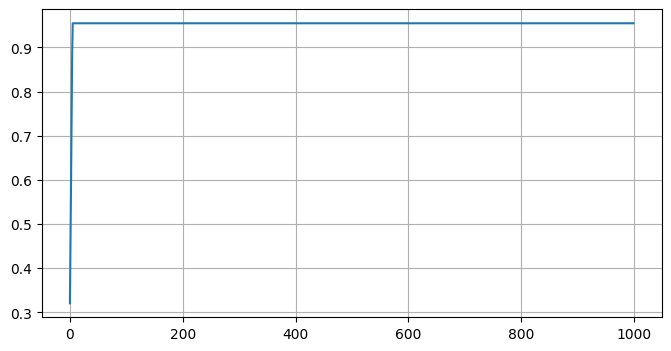

In [75]:
# getting accuracy over the period of the training
acc = history.history.get("accuracy")

# plotting the graph
plt.figure(figsize=(8, 4))
plt.plot(acc)
plt.grid(True)
plt.show()

as we can see that the neural network reaches the 0.95 very soon and then plateaus in the accuracy.
and we can see that there is barely any differnce in a single preceptron and a 1 layer neural network in terms of their accuracy.